In [106]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid') 

%matplotlib inline
import matplotlib as plt
import matplotlib as mpl
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [107]:
train_df = pd.read_csv('train.csv')
train_df.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [108]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [109]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [110]:
train_df.drop(labels = 'Cabin', axis = 1, inplace = True)

In [111]:
train_df.drop(labels = 'Name', axis = 1, inplace = True)

In [112]:
train_df.drop(labels = 'Fare', axis = 1, inplace = True)

In [113]:
train_df.Age.fillna(train_df.Age.median(), inplace = True)

In [114]:
train_df.Embarked.fillna('S', inplace = True)

In [115]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Embarked       0
dtype: int64

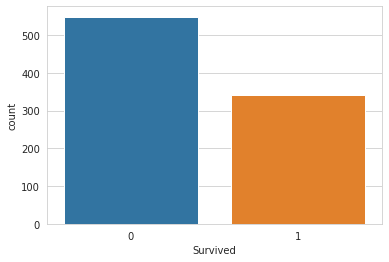

In [116]:
sns.countplot(x='Survived', data=train_df)

In [117]:
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

549 человек не выжило, 342 выжило

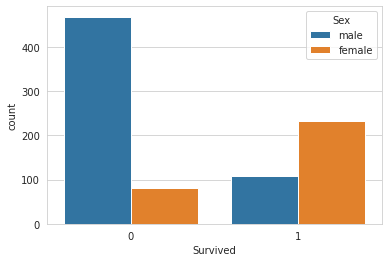

In [118]:
sns.countplot(x='Survived', hue='Sex', data=train_df)

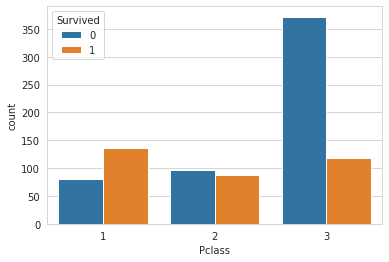

In [119]:
sns.countplot(x='Pclass', hue='Survived', data=train_df)

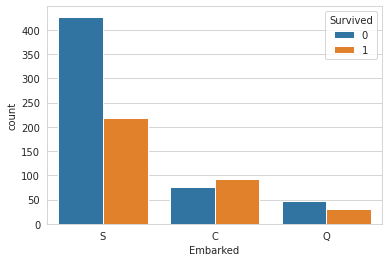

In [120]:
sns.countplot(x='Embarked', hue='Survived', data=train_df)

"Southampton" - "Cherbourg" -  "Queenstown"

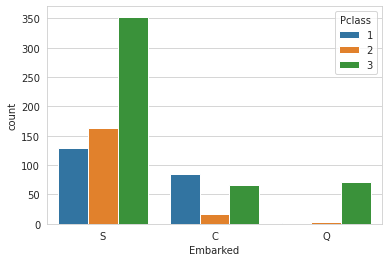

In [121]:
sns.countplot(x='Embarked', hue='Pclass', data=train_df)

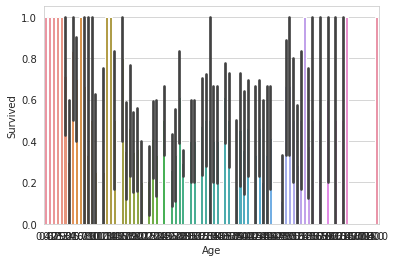

In [122]:
sns.barplot(data=train_df, x="Age", y="Survived")

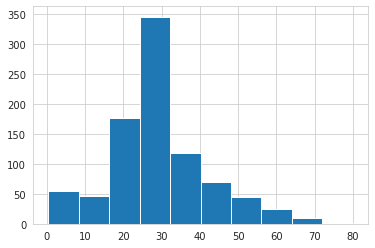

In [123]:
b = train_df.Age.hist()

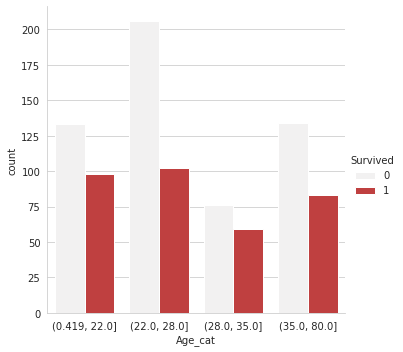

In [124]:
train_df['Age_cat'] = pd.qcut(train_df['Age'], q=4)
sns.catplot(data = train_df,hue = 'Survived', x = 'Age_cat',
            kind='count', saturation=0.5, color='red') 